# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1006.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           6.22e-42
Time:                        07:45:22   Log-Likelihood:                 3.6671
No. Observations:                  50   AIC:                            0.6659
Df Residuals:                      46   BIC:                             8.314
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0787      0.080     63.559      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.60802275  5.07281217  5.49967972  5.86217599  6.14339702  6.33876157
  6.45676382  6.5175778   6.54974285  6.58547467  6.65537241  6.78339127
  6.98290677  7.25451717  7.58594518  7.95405506  8.32865382  8.67745178
  8.97136769  9.18930672  9.32162625  9.37172016  9.35546117  9.29859307
  9.23250103  9.18905511  9.19537414  9.26937015  9.41680544  9.63034591
  9.89076599 10.17010738 10.43627247 10.65829793 10.8114419  10.88124897
 10.86592519 10.77663281 10.63565634 10.4727413  10.32020707 10.20763692
 10.15701762 10.17912697 10.27176314 10.42010637 10.5991538  10.77782743
 10.9240801  11.01016074]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.00688688 10.87575411 10.6357948  10.33038124 10.01660668  9.75130684
  9.57714457  9.5121645   9.54537509  9.63943972]


## Plot comparison

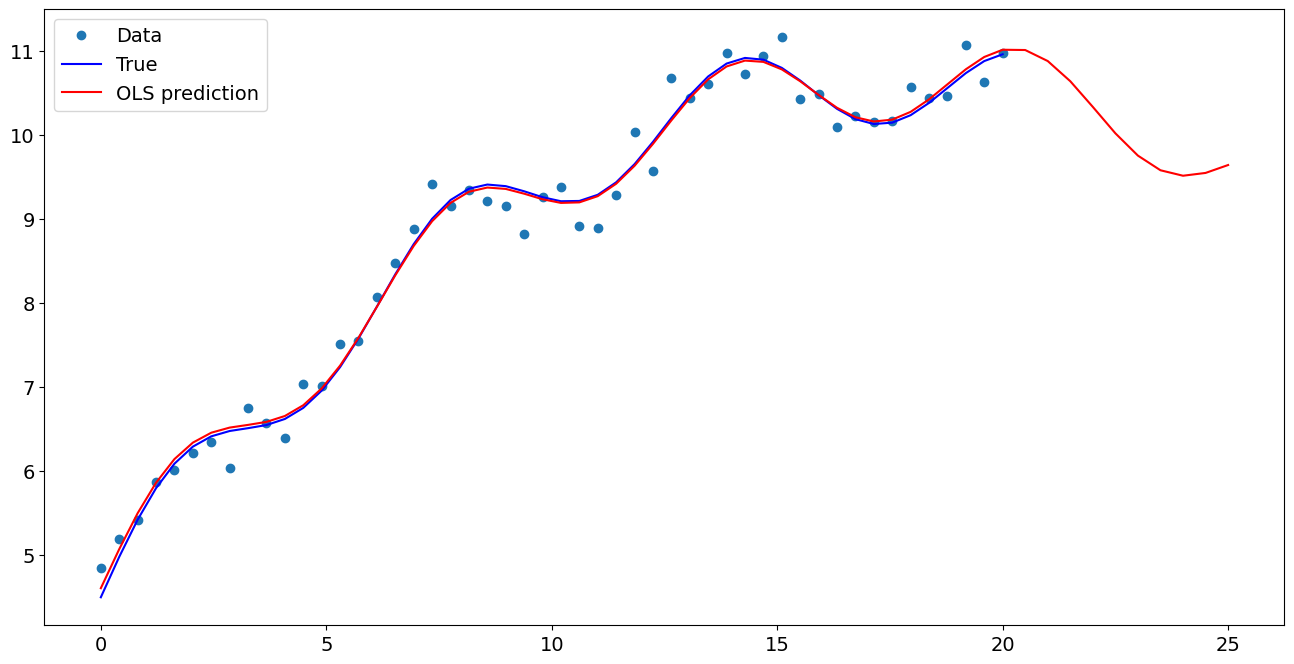

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.078660
x1                  0.486208
np.sin(x1)          0.485318
I((x1 - 5) ** 2)   -0.018825
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.006887
1    10.875754
2    10.635795
3    10.330381
4    10.016607
5     9.751307
6     9.577145
7     9.512165
8     9.545375
9     9.639440
dtype: float64